In [83]:
import pandas as pd

df = pd.read_csv('titanic-passengers.csv',sep=';', encoding="UTF-8")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [84]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [86]:
df.describe()
#pandas profiling

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
df.shape

(891, 12)

In [88]:
print(pd.isnull(df).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [89]:
total=df.isnull().sum().sort_values(ascending=False)
perc1=df.isnull().sum()/df.isnull().count()*100
perc2=(round(perc1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,perc2], axis=1, keys=['Total','%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [90]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [91]:
#df['Survived'] = df['Survived'].map({'Yes':1 ,'No':0})
df = df.replace({'Survived': {'Yes': 1,'No': 0}})

In [92]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
from matplotlib import style



Text(0.5, 1.0, 'Male')

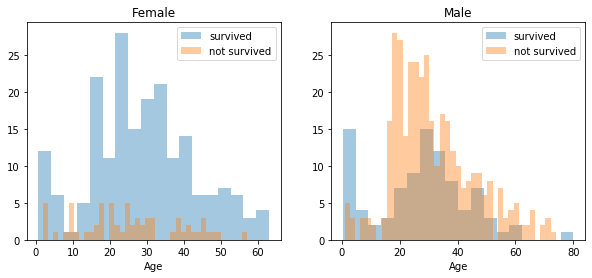

In [94]:
survived='survived'
not_survived='not survived'
fig, axes=plt.subplots(nrows=1, ncols=2,figsize=(10,4))
women=df[df['Sex']=='female']
men=df[df['Sex']=='male']
ax=sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[1], kde=False)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False)
ax.legend()
ax.set_title('Male')

C:\Users\merye\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


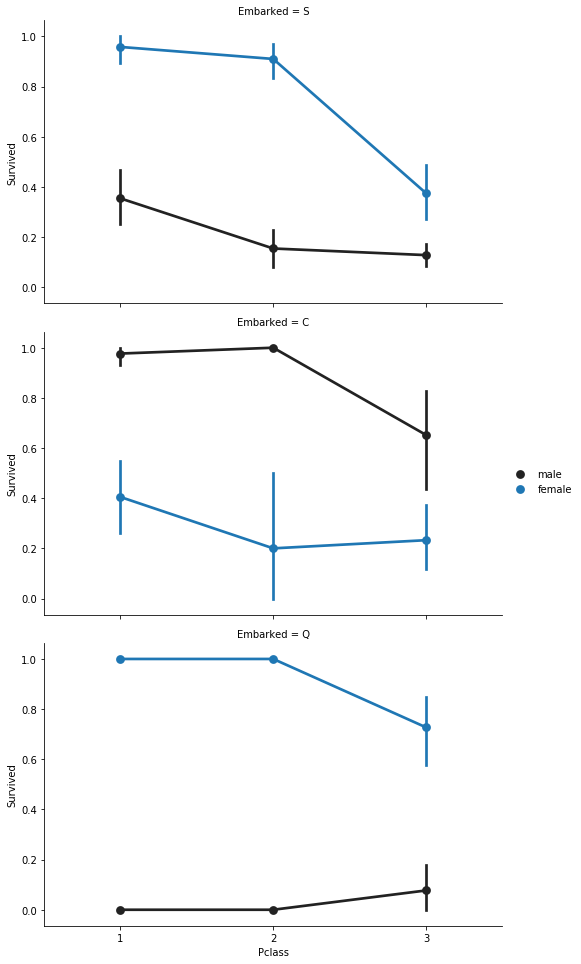

In [95]:
FacetGrid=sns.FacetGrid(df,row='Embarked',size=4.5,aspect=1.6)
FacetGrid.map(sns.pointplot,'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

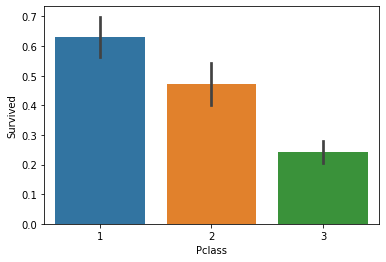

In [96]:
sns.barplot(x='Pclass',y='Survived',data=df)

C:\Users\merye\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


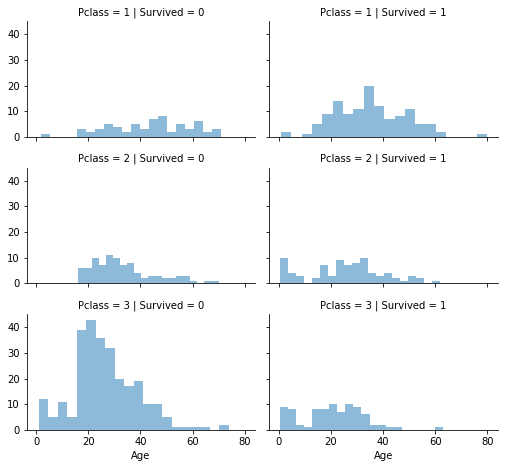

In [97]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [98]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

"  Fare a une forte corrélation avec Pclass du -0.55 et on n'oublie pas les autres attributs comme Survived,Parch. \n Parch et Sibsp ont une corrélation de 0.41; Age et Pclass ont une corrélation de -0.037 "

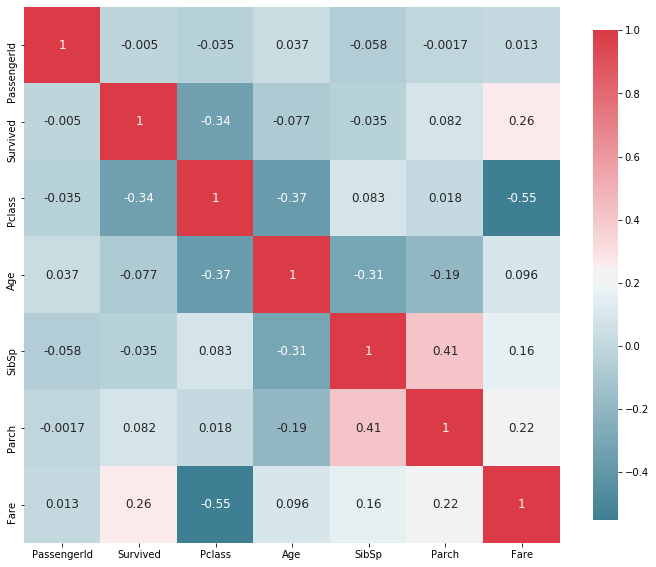

In [99]:
plot_correlation_map( df )
''' Les coefficients de corrélation se situent dans l’intervalle [-1,1].
– si le coefficient est proche de 1 c’est qu’il y a une forte corrélation positive
– si le coefficient est proche de -1 c’est qu’il y a une forte corrélation négative
– si le coefficient est proche de 0 en valeur absolue c’est qu’il y a une faible corrélation '''

'''  Fare a une forte corrélation avec Pclass du -0.55 et on n'oublie pas les autres attributs comme Survived,Parch. 
 Parch et Sibsp ont une corrélation de 0.41; Age et Pclass ont une corrélation de -0.037 '''



In [100]:
df.groupby(['Pclass', 'Survived']).mean()

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      0          410.300000  43.695312  0.287500  0.300000  64.684008
       1          491.772059  35.368197  0.492647  0.389706  95.608029
2      0          452.123711  33.544444  0.319588  0.144330  19.412328
       1          439.080460  25.901566  0.494253  0.643678  22.055700
3      0          453.580645  26.555556  0.672043  0.384409  13.669364
       1          394.058824  20.646118  0.436975  0.420168  13.694887

In [101]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [102]:
df1=df

In [103]:
df1['Title'] = df1.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [108]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mrs
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mrs
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mrs
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,Mrs
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,Mrs


In [109]:
df1['Title'].unique()

array(['Mrs', 'Miss', 'Officier', 'Royalty', 'Master'], dtype=object)

In [110]:
df1['Title'] = df1['Title'].replace(['Capt', 'Col','Dr', 'Major', 'Rev'], 'Officier')
df1['Title'] = df1['Title'].replace(['Jonkheer', 'Don','Sir', 'Lady', 'Countess'], 'Royalty')
df1['Title'] = df1['Title'].replace(['Mlle', 'Mme'], 'Miss')
df1['Title'] = df1['Title'].replace('Mme', 'Mrs')
df1['Title'] = df1['Title'].replace(['Ms', 'Mr'], 'Mrs')

In [111]:
df1['Title'].unique()

array(['Mrs', 'Miss', 'Officier', 'Royalty', 'Master'], dtype=object)

C:\Users\merye\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


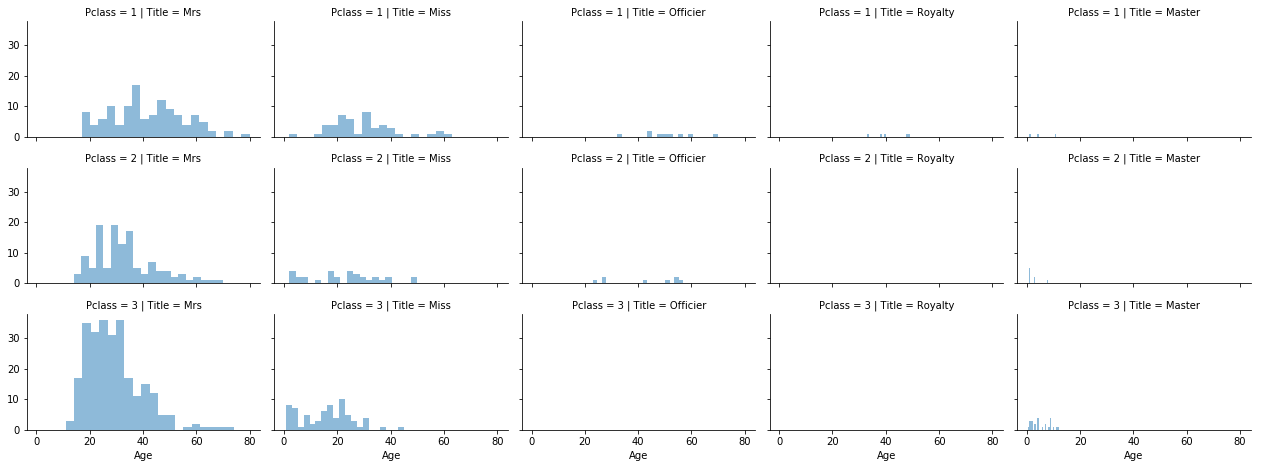

In [112]:
grid = sns.FacetGrid(df1, col='Title', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

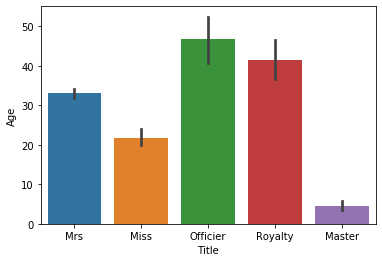

In [115]:
sns.barplot(x='Title',y='Age',data=df1)

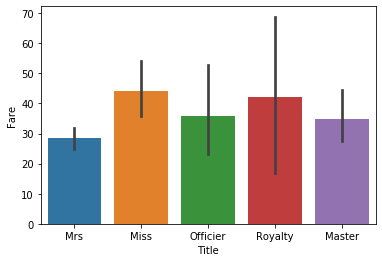

In [117]:
sns.barplot(x='Title',y='Fare',data=df1)

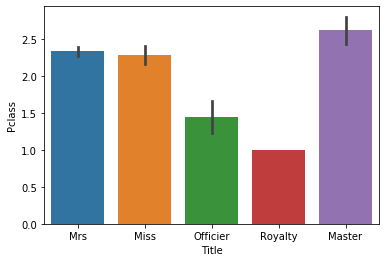

In [114]:
sns.barplot(x='Title',y='Pclass',data=df1)

In [120]:
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1

In [121]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mrs,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mrs,1
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mrs,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs,5
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,2
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,Mrs,1
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,Miss,1
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,Mrs,1


In [119]:
#df.drop(['Cabin'],axis=1)